<a href="https://colab.research.google.com/github/peteray-dev/Insurance-premium-ML/blob/master/Insurance_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [2]:
!kaggle competitions download playground-series-s4e12

 85% 64.0M/75.5M [00:00<00:00, 157MB/s]
100% 75.5M/75.5M [00:00<00:00, 151MB/s]


In [3]:
! mkdir train_test_generated

! unzip /content/playground-series-s4e12.zip -d train_test_generated


Archive:  /content/playground-series-s4e12.zip
  inflating: train_test_generated/sample_submission.csv  
  inflating: train_test_generated/test.csv  
  inflating: train_test_generated/train.csv  


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [5]:
df_train = pd.read_csv('/content/train_test_generated/train.csv', index_col='id')
df_test = pd.read_csv('/content/train_test_generated/test.csv', index_col='id')
df_train.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [6]:
display(df_test.info())
display(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 800000 entries, 1200000 to 1999999
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   787511 non-null  float64
 1   Gender                800000 non-null  object 
 2   Annual Income         770140 non-null  float64
 3   Marital Status        787664 non-null  object 
 4   Number of Dependents  726870 non-null  float64
 5   Education Level       800000 non-null  object 
 6   Occupation            560875 non-null  object 
 7   Health Score          750551 non-null  float64
 8   Location              800000 non-null  object 
 9   Policy Type           800000 non-null  object 
 10  Previous Claims       557198 non-null  float64
 11  Vehicle Age           799997 non-null  float64
 12  Credit Score          708549 non-null  float64
 13  Insurance Duration    799998 non-null  float64
 14  Policy Start Date     800000 non-null  object 
 15

None

<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-null 

None

In [7]:
# getting the unique item

item = df_train.select_dtypes(include=['object']).columns.tolist()
for i in item:
  display(f'{i}_train: {df_train[i].nunique()}')
  display(f'{i}_test: {df_test[i].nunique()}')

'Gender_train: 2'

'Gender_test: 2'

'Marital Status_train: 3'

'Marital Status_test: 3'

'Education Level_train: 4'

'Education Level_test: 4'

'Occupation_train: 3'

'Occupation_test: 3'

'Location_train: 3'

'Location_test: 3'

'Policy Type_train: 3'

'Policy Type_test: 3'

'Policy Start Date_train: 167381'

'Policy Start Date_test: 158776'

'Customer Feedback_train: 3'

'Customer Feedback_test: 3'

'Smoking Status_train: 2'

'Smoking Status_test: 2'

'Exercise Frequency_train: 4'

'Exercise Frequency_test: 4'

'Property Type_train: 3'

'Property Type_test: 3'

In [8]:
display(df_train.isnull().sum())
display(df_test.isnull().sum() )

,0
Age,18705
Gender,0
Annual Income,44949
Marital Status,18529
Number of Dependents,109672
Education Level,0
Occupation,358075
Health Score,74076
Location,0
Policy Type,0


,0
Age,12489
Gender,0
Annual Income,29860
Marital Status,12336
Number of Dependents,73130
Education Level,0
Occupation,239125
Health Score,49449
Location,0
Policy Type,0


In [9]:
df_train.drop(columns='Policy Start Date', inplace=True)
df_test.drop(columns='Policy Start Date', inplace=True)

cat_col = df_train.select_dtypes(include=['object']).columns.tolist()
num_col = df_train.select_dtypes(exclude=['object']).columns.tolist()[:-1]

In [10]:
item = df_train.select_dtypes(include=['object']).columns.tolist()
for i in item:
  display(f'{i}_train: {df_train[i].nunique()}')
  display(f'{i}_test: {df_test[i].nunique()}')

'Gender_train: 2'

'Gender_test: 2'

'Marital Status_train: 3'

'Marital Status_test: 3'

'Education Level_train: 4'

'Education Level_test: 4'

'Occupation_train: 3'

'Occupation_test: 3'

'Location_train: 3'

'Location_test: 3'

'Policy Type_train: 3'

'Policy Type_test: 3'

'Customer Feedback_train: 3'

'Customer Feedback_test: 3'

'Smoking Status_train: 2'

'Smoking Status_test: 2'

'Exercise Frequency_train: 4'

'Exercise Frequency_test: 4'

'Property Type_train: 3'

'Property Type_test: 3'

<Axes: >

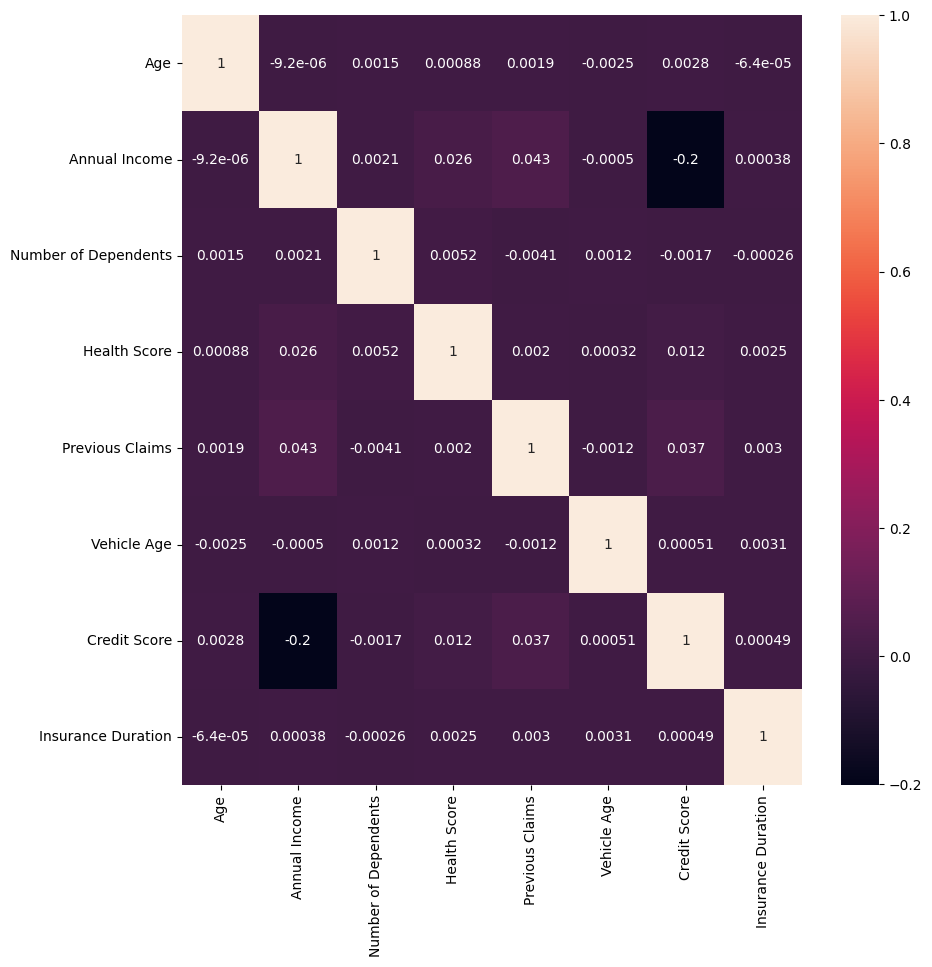

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train[num_col].corr(), annot=True)

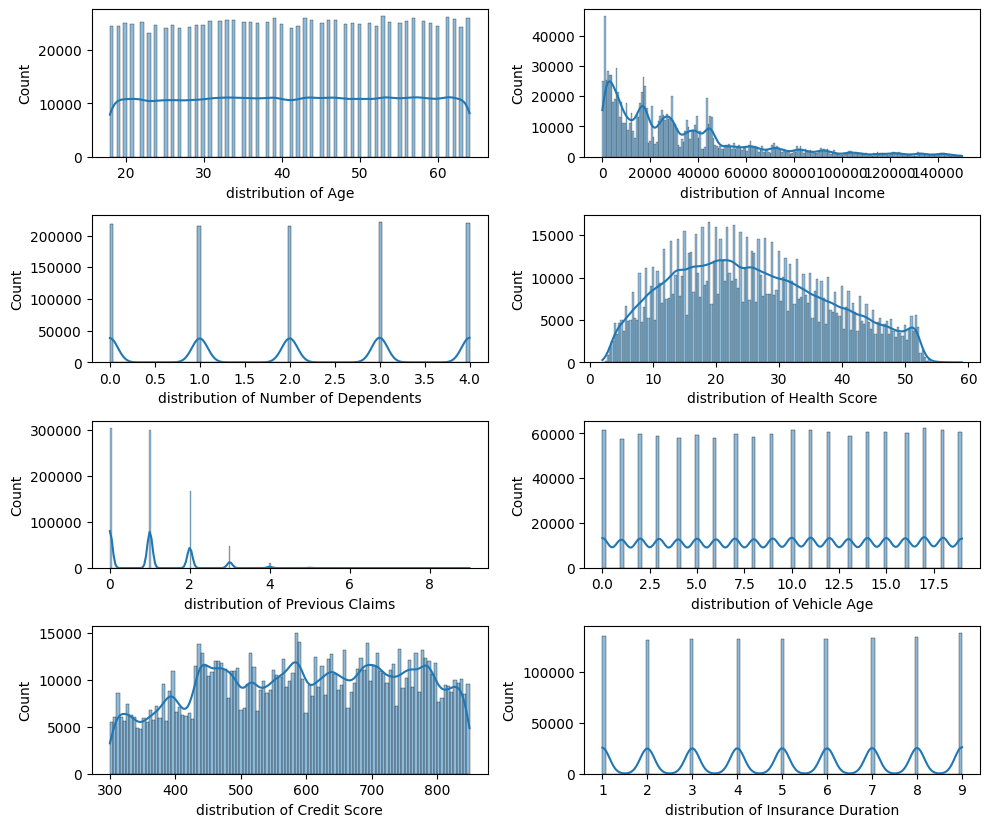

In [12]:
plt.figure(figsize=(10,10))
i=1
for col in num_col:
  plt.subplot(5,2,i)
  sns.histplot(df_train[col], kde=True)
  i+=1
  plt.xlabel(f'distribution of {col}')
  plt.tight_layout()



In [13]:
# plt.figure(figsize=(10,10))
# i=1
# for col in cat_col:
#   plt.subplot(5,2,i)
#   sns.countplot(df_train[col])
#   i+=1
#   plt.xlabel(f'distribution of {col}')
#   plt.tight_layout()



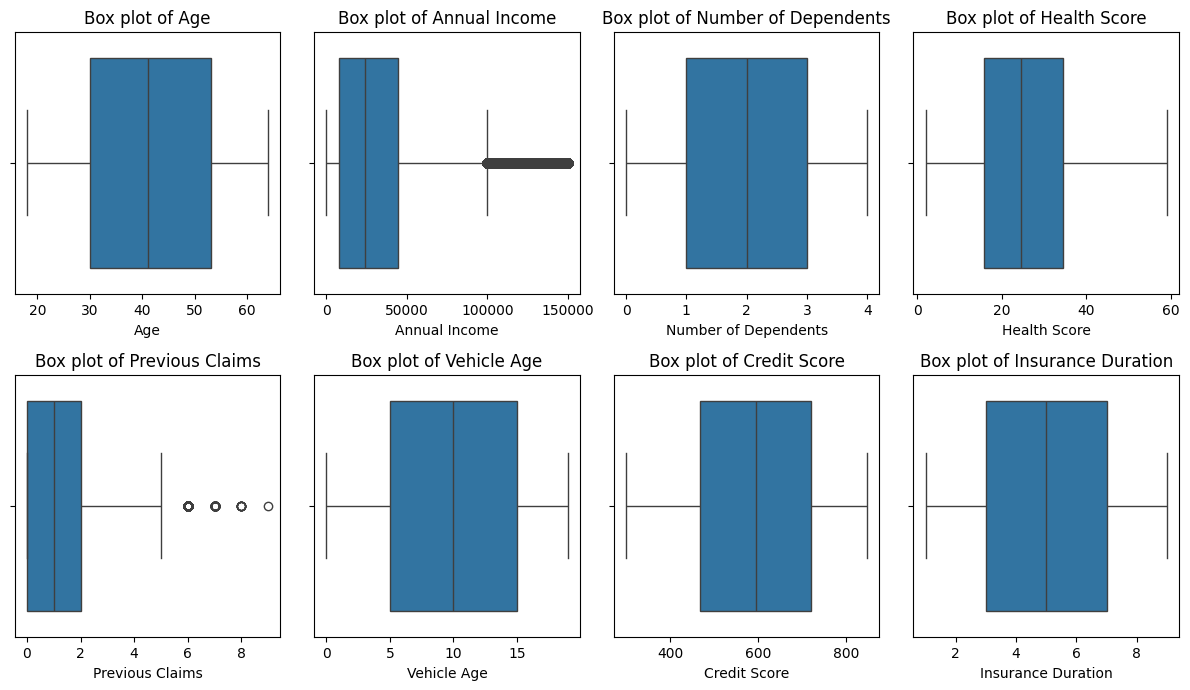

In [14]:
plt.figure(figsize=(12,10))
for i,col in enumerate(num_col):
  plt.subplot(3,4,i+1)
  sns.boxplot(x=df_train[col])
  plt.title(f"Box plot of {col}")
  plt.tight_layout()
plt.show()

In [15]:

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Example usage for all numerical columns
for col in num_col:
    df_train = remove_outliers(df_train, col)

In [16]:
num_col

['Age',
 'Annual Income',
 'Number of Dependents',
 'Health Score',
 'Previous Claims',
 'Vehicle Age',
 'Credit Score',
 'Insurance Duration']

In [19]:
# replace all missing values

# from sklearn.impute import SimpleImputer

def impute_missing_values(df_train, df_test, num_col, cat_col):
    num_imputer = SimpleImputer(strategy='mean')
    df_train[num_col] = num_imputer.fit_transform(df_train[num_col])
    df_test[num_col] = num_imputer.transform(df_test[num_col])

    cat_imputer = SimpleImputer(strategy='most_frequent')
    df_train[cat_col] = cat_imputer.fit_transform(df_train[cat_col])
    df_test[cat_col] = cat_imputer.transform(df_test[cat_col])
    return df_train, df_test

df_train, df_test = impute_missing_values(df_train, df_test, num_col, cat_col)


In [20]:

def label_encode_categorical(df_train, df_test, cat_col):
    label_encoder = LabelEncoder()
    for col in cat_col:
        df_train[col] = label_encoder.fit_transform(df_train[col])
        df_test[col] = label_encoder.transform(df_test[col])
    return df_train, df_test

df_train, df_test = label_encode_categorical(df_train, df_test, cat_col)

In [21]:

def num_scaler(df_train, df_test, num_col):
  scaler = StandardScaler()
  df_train[num_col] = scaler.fit_transform(df_train[num_col])
  df_test[num_col] = scaler.transform(df_test[num_col])
  return df_train, df_test

df_train, df_test = num_scaler(df_train, df_test, num_col)

In [22]:


X = df_train.drop(columns='Premium Amount')
y = df_train['Premium Amount']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:



# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
# rfr = RandomForestRegressor()
lgbm = LGBMRegressor(n_estimators =500,
                    learning_rate =0.1)

In [40]:
def evaluate_model(model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    print(f'MAE for {model}: {mean_absolute_error(y_val, y_pred)}')
    print(f'RMSE for {model}: {np.sqrt(mean_squared_error(y_val, y_pred))}')
    print(f'R2 for {model}: {r2_score(y_val, y_pred)}')

In [28]:
# rfr = RandomForestRegressor()
# rfr.fit(X_train, y_train)
# y_pred = rfr.predict(X_val)
# # print(f'MSE: {mean_squared_error(y_val, y_pred)}')
# print(f'MAE: {mean_absolute_error(y_val, y_pred)}')
# print(f'RMSE: {np.sqrt(mean_squared_error(y_val, y_pred))}')
# print(f'R2: {r2_score(y_val, y_pred)}')

In [33]:
# evaluate_model(rfr, X_train, X_val, y_train, y_val)

In [41]:
evaluate_model(lgbm, X_train, X_val, y_train, y_val)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 883
[LightGBM] [Info] Number of data points in the train set: 446688, number of used features: 18
[LightGBM] [Info] Start training from score 1113.624499
MAE for LGBMRegressor(n_estimators=500): 640.9740201613527
RMSE for LGBMRegressor(n_estimators=500): 839.680927807293
R2 for LGBMRegressor(n_estimators=500): 0.031365083172634756


In [51]:
from sklearn.model_selection import KFold
k = KFold(n_splits=5)

In [52]:
param_grid = {
    'learning_rate': [0.01, 0.05],
    'n_estimators': [250, 500],
    'num_leaves': [20, 30, 40],
    'max_depth': [10, 20, 30],
}

grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring=accuracy_score,
    cv=k,
    verbose=2,
    n_jobs=-1
)

In [ ]:
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


## Submission

In [48]:
df_test['Age']

,Age
id,
1200000,-0.969769
1200001,-0.748240
1200002,0.433245
1200003,-0.969769
1200004,-1.265140
...,...
1999995,0.654773
1999996,0.000000
1999997,-1.117454


In [42]:
prediction = lgbm.predict(df_test)

In [49]:
res = pd.DataFrame({"id":df_test.index,
                   "Premium Amount":prediction})
res = res.set_index("id")
res

,Premium Amount
id,
1200000,1348.189217
1200001,1113.173993
1200002,1119.285551
1200003,1098.321341
1200004,1021.441075
...,...
1999995,1388.777266
1999996,1567.981468
1999997,1089.113048


In [50]:
res.to_csv("Submission.csv")
